# Разведочный анализ данных. Исследование и визуализация данных.
## 1) Текстовое описание набора данных
В качестве набора данных мы будем использовать набор данных о 442 пациентах с диабетом - https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

Датасет состоит из трех файлов:

diabet.txt - обучающая выборка (в этом примере используется только данный файл)

Файл содержит следующие колонки:

+ age - возраст в годах
+ sex - пол
+ bmi - индекс массы тела
+ bp -  среднее значение артериального давления
+ s1 -  tc, Общий уровень холестерина(холестерола) в сыворотке крови
+ s2 -  ЛПНП, концентрация липопротеидов низкой плотности
+ s3 -  ЛПВП, концентрация липопротеидов высокой плотности
+ s4 -  tch, Холестерин(Холестерол) общий
+ s5 -  ltg, Сывороточный уровень триглицеридов
+ s6 -  glu, Уровень сахара в крови
+ Y  -  Количественный показатель прогрессирования заболевания через год после базового уровня

## Импорт библиотек
Импортируем библиотеки с помощью команды import. 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Загрузка данных
Загрузим файлы датасета в помощью библиотеки Pandas.

Не смотря на то, что файлы имеют расширение txt они представляют собой данные в формате CSV, столбцы разделены табуляцией

In [3]:
data = pd.read_csv('diabet.txt', sep="	")

## 2) Основные характеристики датасета

In [19]:
# Первые 5 строк датасета
data.head()

AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135

In [20]:
# Размер датасета - 442 строк, 11 колонок
data.shape

(442, 11)

In [21]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 442


In [22]:
# Список колонок
data.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')

In [23]:
# Список колонок с типами данных
data.dtypes

AGE      int64
SEX      int64
BMI    float64
BP     float64
S1       int64
S2     float64
S3     float64
S4     float64
S5     float64
S6       int64
Y        int64
dtype: object

In [24]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

AGE - 0
SEX - 0
BMI - 0
BP - 0
S1 - 0
S2 - 0
S3 - 0
S4 - 0
S5 - 0
S6 - 0
Y - 0


In [25]:
# Основные статистические характеристки набора данных
data.describe()

AGE         SEX         BMI          BP          S1          S2  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     19.000000    1.000000   18.000000   62.000000   97.000000   41.600000   
25%     38.250000    1.000000   23.200000   84.000000  164.250000   96.050000   
50%     50.000000    1.000000   25.700000   93.000000  186.000000  113.000000   
75%     59.000000    2.000000   29.275000  105.000000  209.750000  134.500000   
max     79.000000    2.000000   42.200000  133.000000  301.000000  242.400000   

               S3          S4          S5          S6           Y  
count  442.000000  442.000000  442.000000  442.000000  442.000000  
mean    49.788462    4.070249    4.641411   91.260181  152.133484  
std     12.934202    1.290450    0.522391   11.496335   77.093005  
min     22.000000    2.000000    3.258100   58.000000   25.000000  
25%     40.250000    3.000000    4.276700   83.250000   87.000000  
50%     48.000000    4.000000    4.620050   91.000000  140.500000  
75%     57.750000    5.000000    4.997200   98.000000  211.500000  
max     99.000000    9.090000    6.107000  124.000000  346.000000

In [26]:
# Определим уникальные значения для целевого признака
data['Y'].unique()

array([151,  75, 141, 206, 135,  97, 138,  63, 110, 310, 101,  69, 179,
       185, 118, 171, 166, 144, 168,  68,  49, 245, 184, 202, 137,  85,
       131, 283, 129,  59, 341,  87,  65, 102, 265, 276, 252,  90, 100,
        55,  61,  92, 259,  53, 190, 142, 155, 225, 104, 182, 128,  52,
        37, 170,  71, 163, 150, 160, 178,  48, 270, 111,  42, 200, 113,
       143,  51, 210, 134,  98, 164,  96, 162, 279,  83, 302, 198,  95,
       232,  81, 246, 297, 258, 229, 275, 281, 173, 180,  84, 121, 161,
        99, 109, 115, 268, 274, 158, 107, 103, 272, 280, 336, 317, 235,
        60, 174, 126, 288,  88, 292, 197, 186,  25, 195, 217, 172, 214,
        70, 220, 152,  47,  74, 295, 127, 237,  64,  79,  91, 116,  86,
       122,  72,  39, 196, 222, 277,  77, 191,  73, 263, 248, 296,  78,
        93, 208, 108, 154, 124,  67, 257, 262, 177, 187, 125, 215, 303,
       243, 153, 346,  89,  50, 308, 145,  45, 264, 241,  66,  94, 230,
       181, 156, 233, 219,  80, 332,  31, 236, 253,  44, 114, 14

Целевой признак является целочисленным и содержит массив значений.

## 3) Визуальное исследование датасета
Для визуального исследования могут быть использованы различные виды диаграмм, мы построим только некоторые варианты диаграмм, которые используются достаточно часто.

### Диаграмма рассеяния

Text(0.5, 1.0, 'Body mass index versus Age')

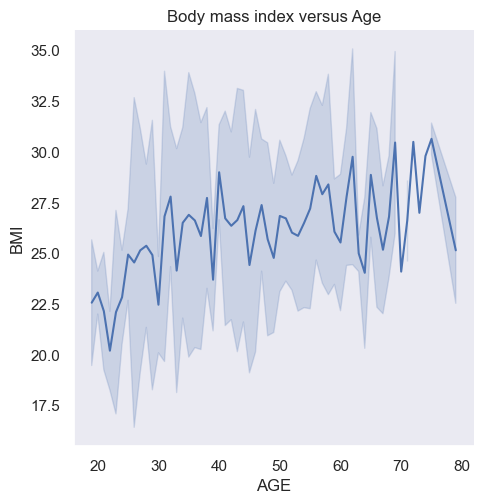

In [171]:
palette = sns.color_palette("mako_r", 2)

sns.relplot(x = "AGE", y = "BMI", kind = "line", ci = "sd", data = data, palette=palette)

plt.ylabel("BMI")
plt.title("Body mass index versus Age")

### Диаграмма рассеяния с разделением по полам

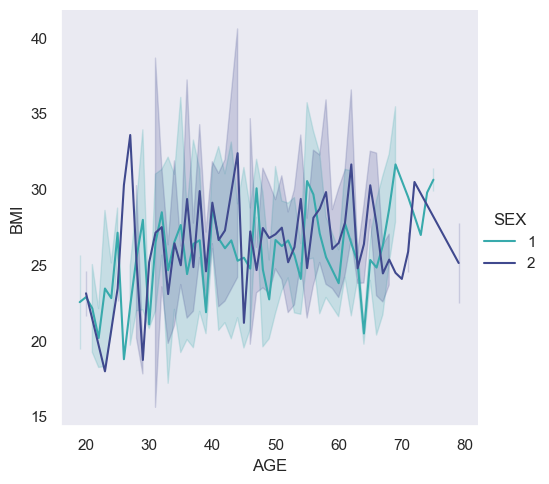

In [173]:
sns.relplot(x = "AGE", y = "BMI", kind = "line", ci = "sd", data = data, hue="SEX", palette=palette)

### Гистограмма
Позволяет оценить плотность вероятности распределения данных. В нашем случае это оценка состояния пациентов через год.

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Y', ylabel='Density'>

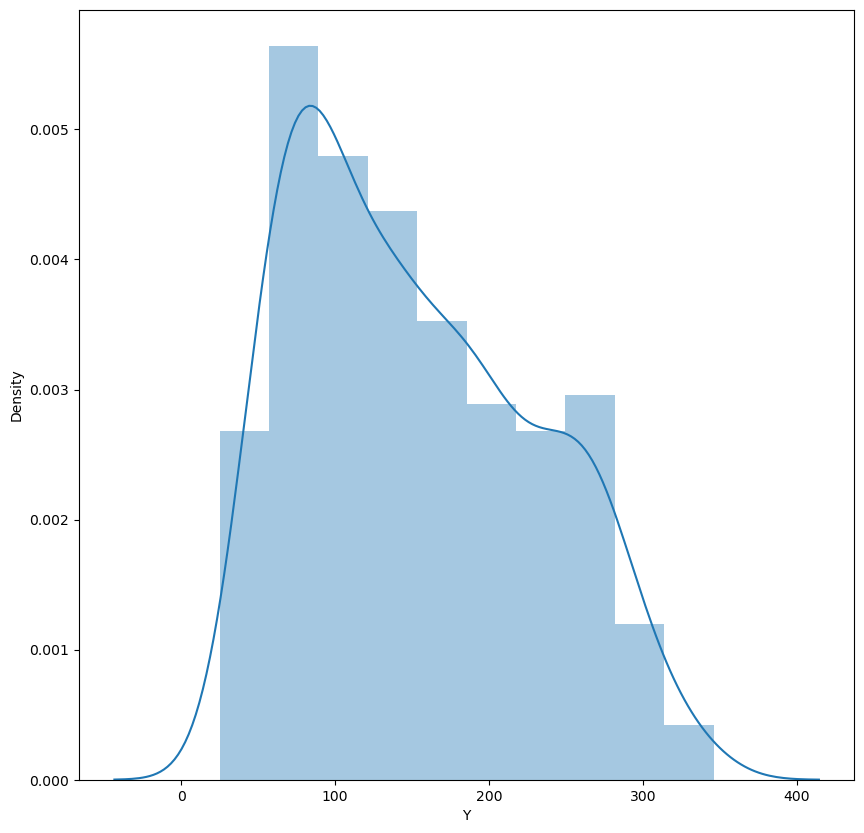

In [4]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Y'])

Данная гистограмма демонстрирует нам количество пациентов 2ух полов, группированное по возрасту

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


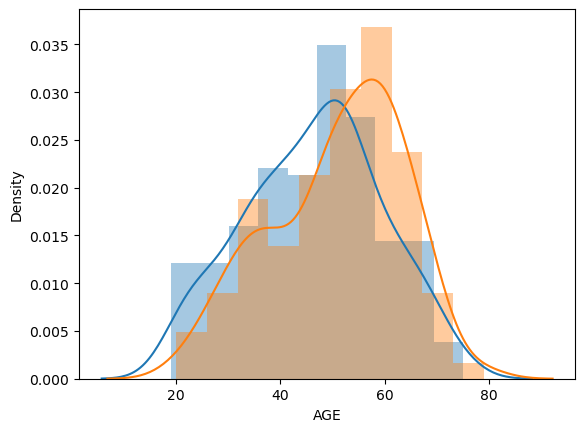

In [17]:
sns.distplot(data.loc[data['SEX'] == 1]['AGE'])
sns.distplot(data.loc[data['SEX'] == 2]['AGE'])
plt.show()

### Jointplot
Комбинация гистограмм и диаграмм рассеивания.
В нашем случае это зависимость артериального давления от ИМТ

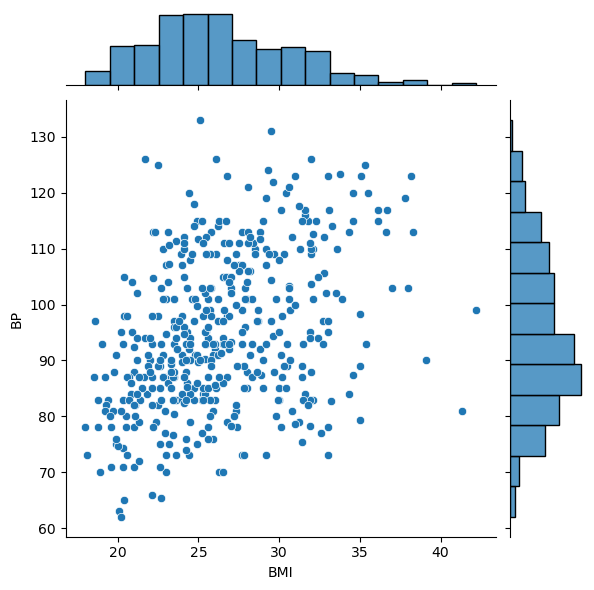

In [14]:
sns.jointplot(x='BMI', y='BP', data=data)

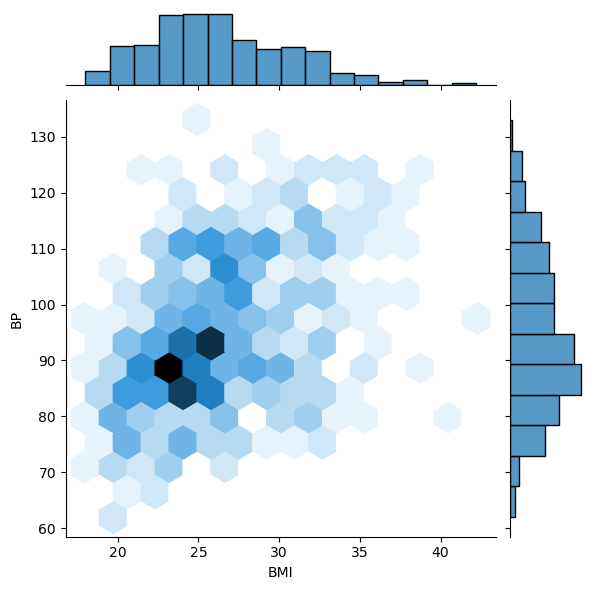

In [6]:
sns.jointplot(x='BMI', y='BP', data=data, kind="hex")

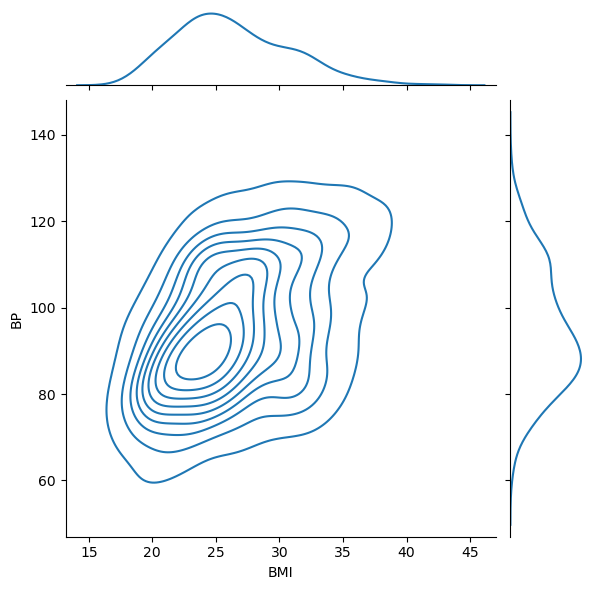

In [18]:
sns.jointplot(x='BMI', y='BP', data=data, kind="kde")

## Парные диаграммы
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

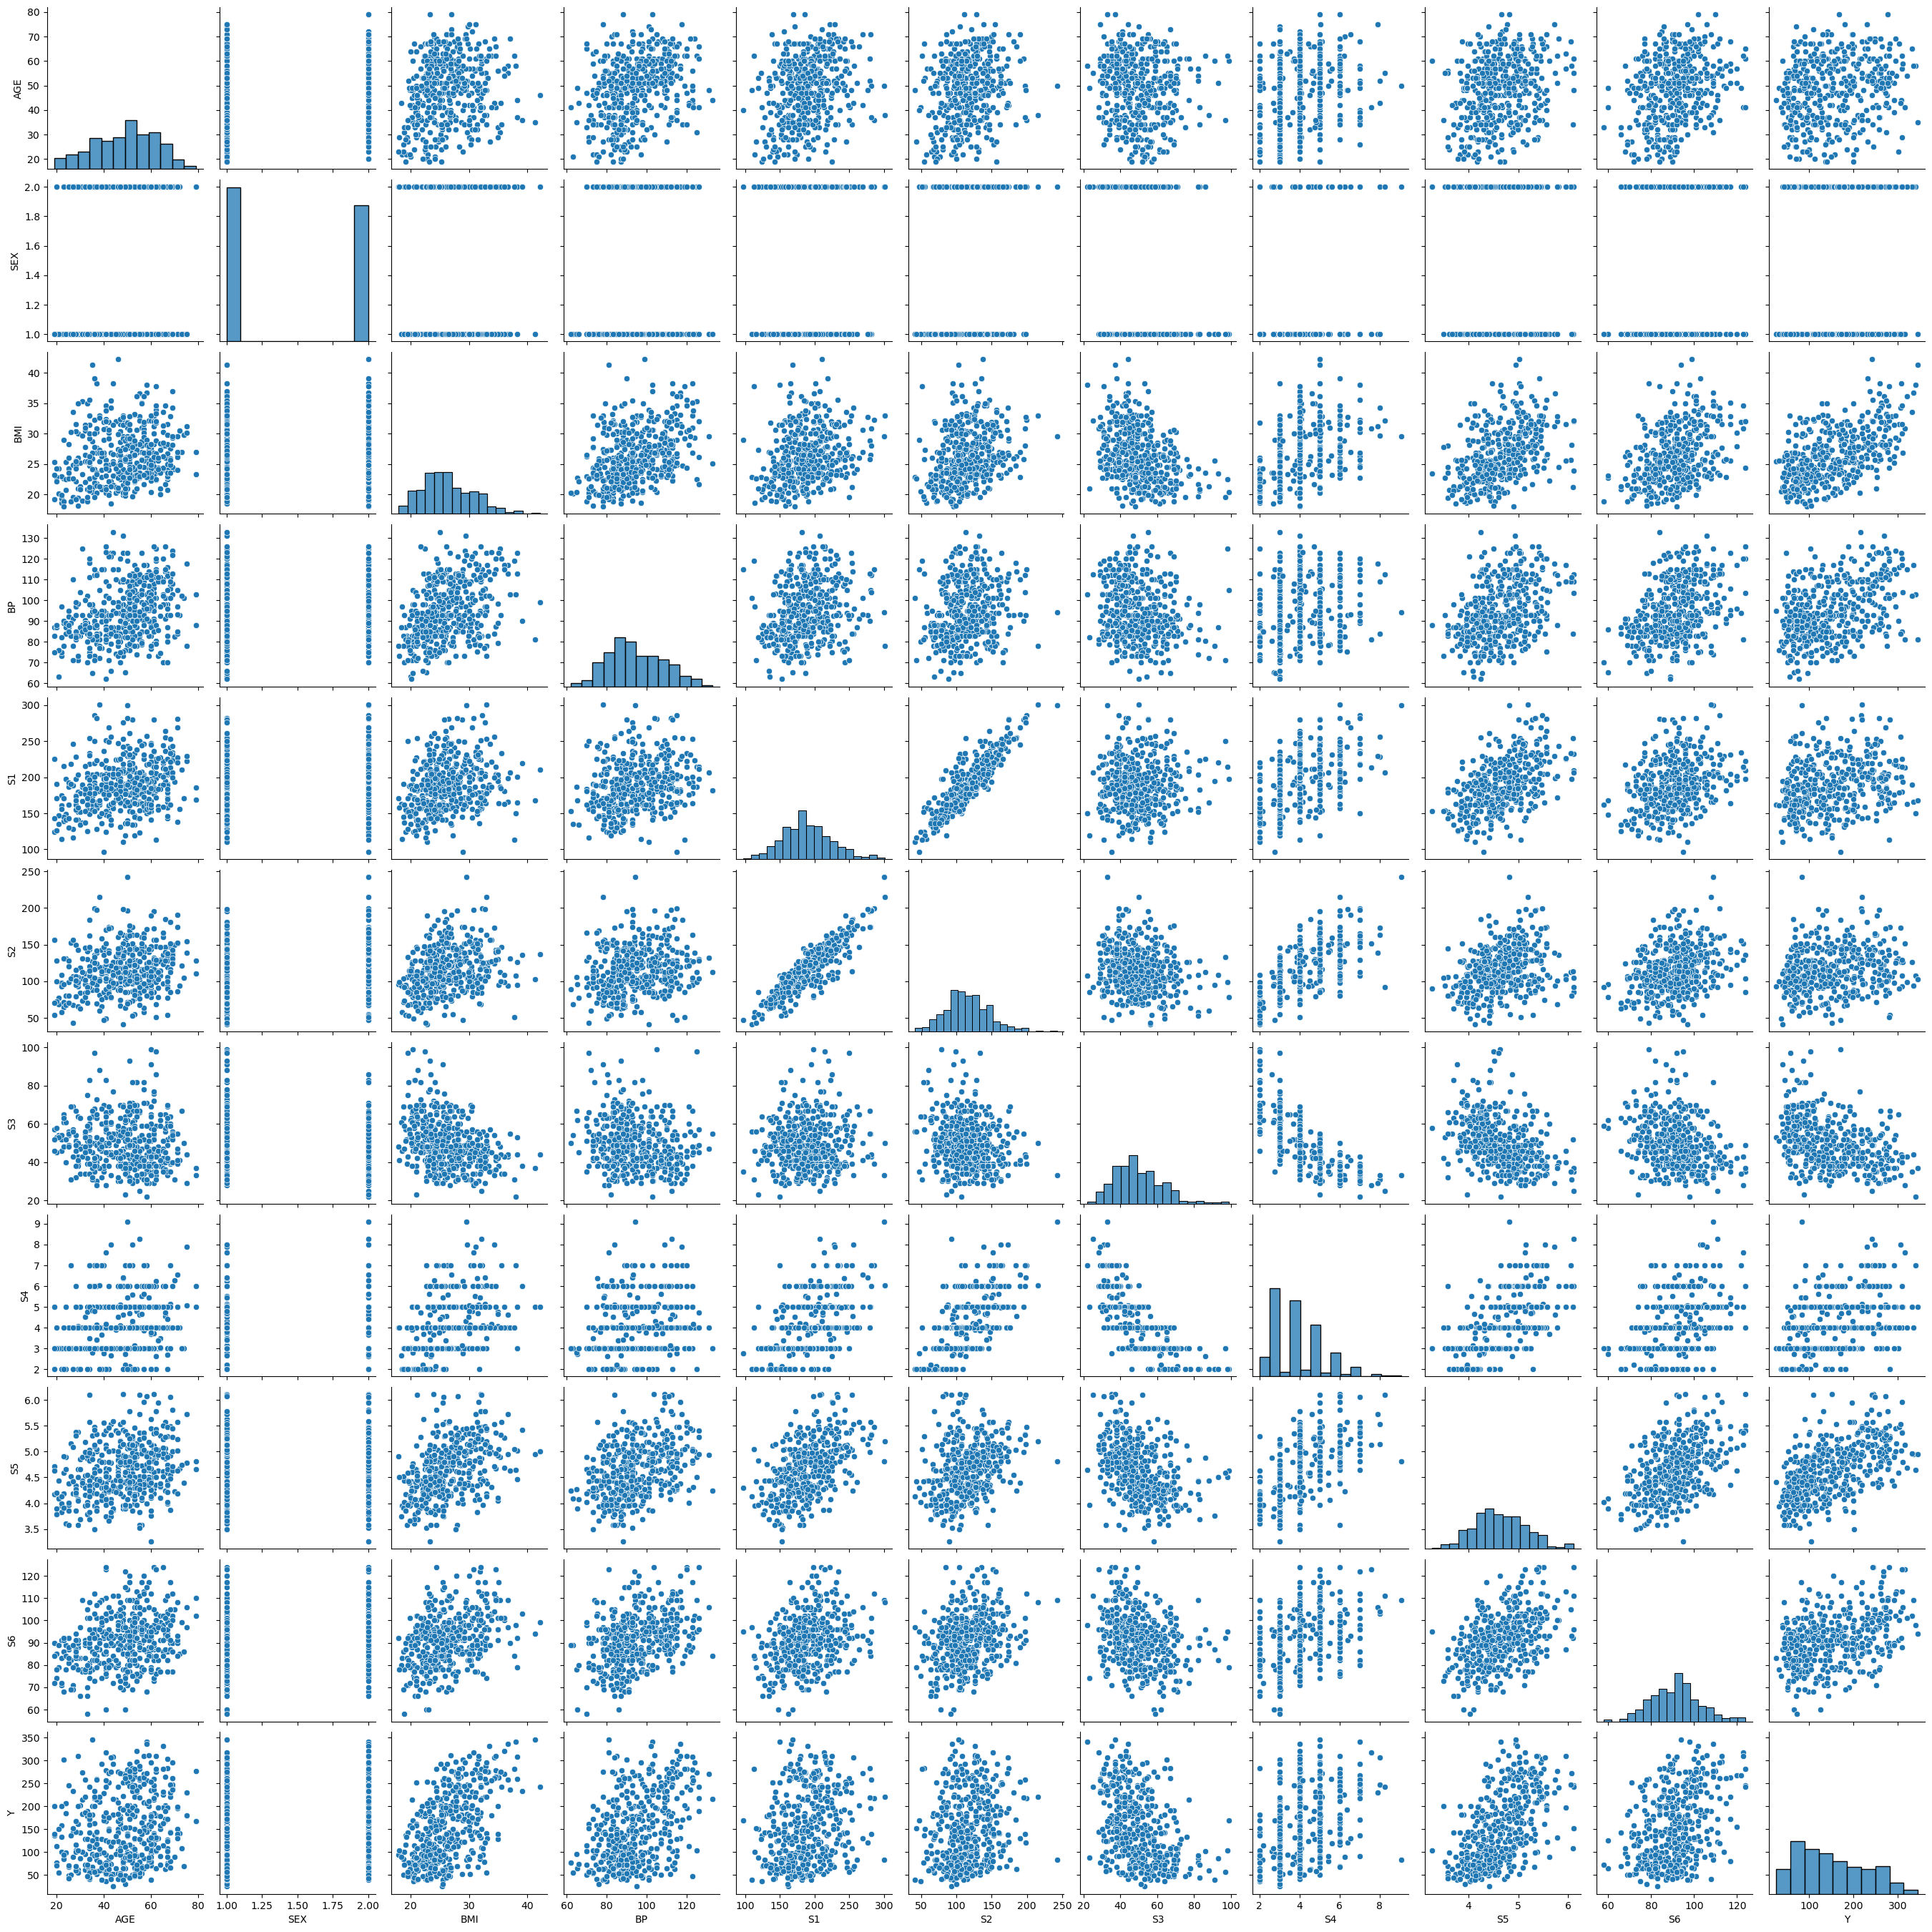

In [19]:
sns.pairplot(data)

Сгруппируем по признаку ИМТ

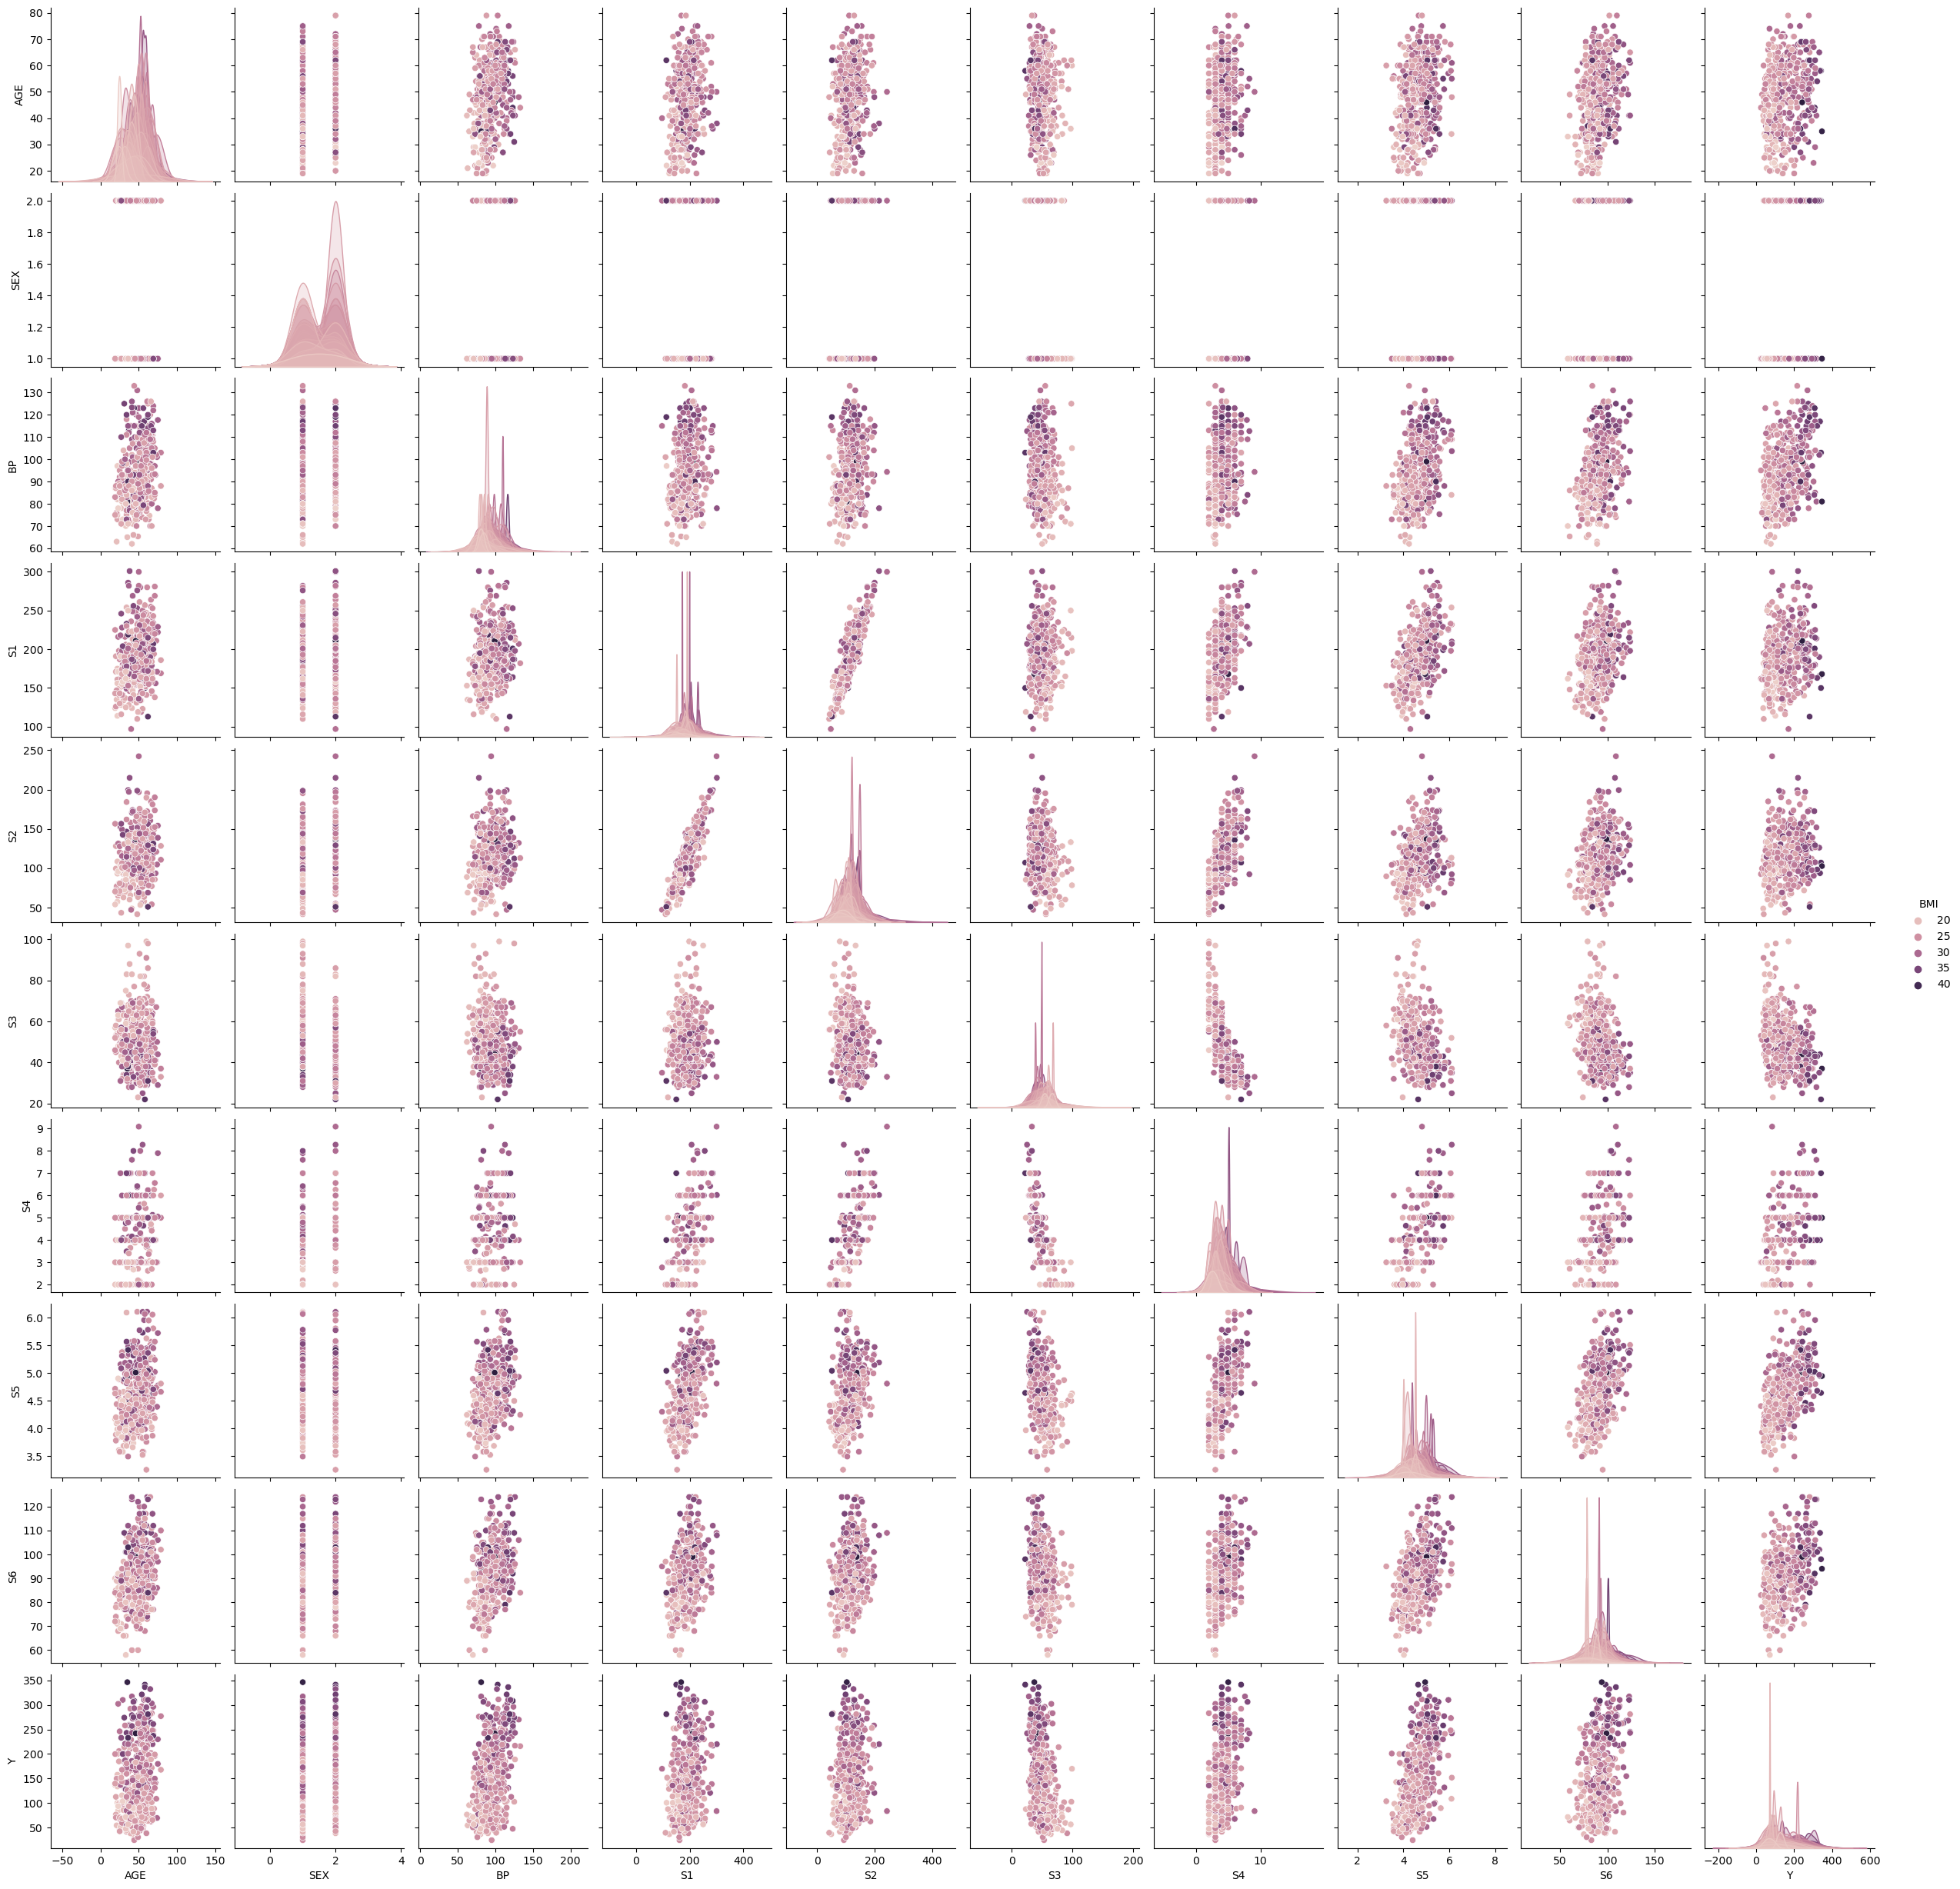

In [20]:
sns.pairplot(data, hue="BMI")

## Ящик с усами
Отображает одномерное распределение вероятности. В нашем случае распределение по состоянию пациентов через год

<AxesSubplot:xlabel='Y'>

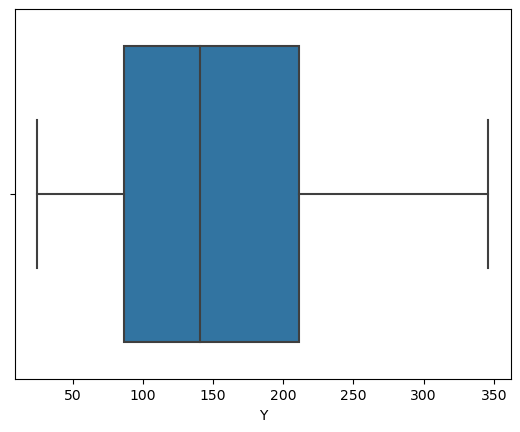

In [21]:
sns.boxplot(x=data['Y'])

<AxesSubplot:ylabel='Y'>

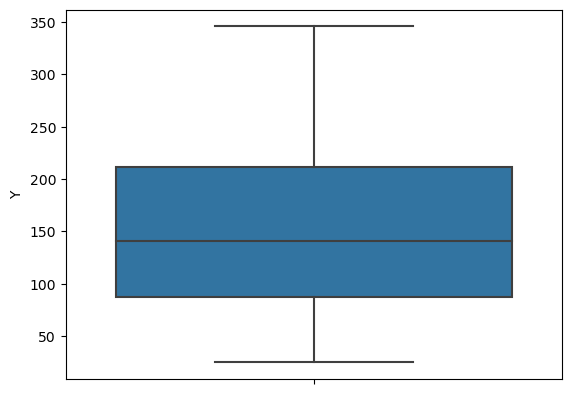

In [22]:
# По вертикали
sns.boxplot(y=data['Y'])

<AxesSubplot:xlabel='SEX', ylabel='Y'>

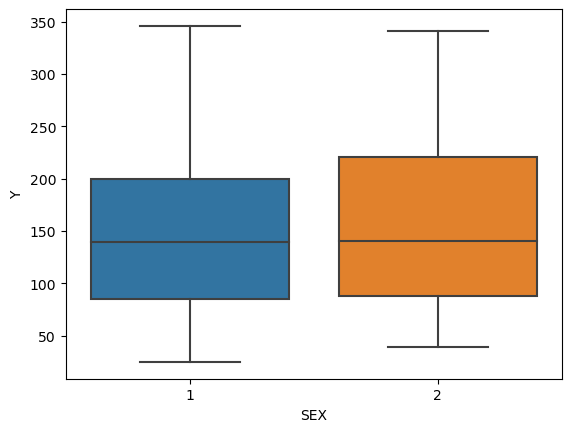

In [27]:
# Распределение параметра Y сгруппированные по SEX.
sns.boxplot(x='SEX', y='Y', data=data)

## Violin plot


Это расширение графика Ящик с усами

<AxesSubplot:xlabel='Y'>

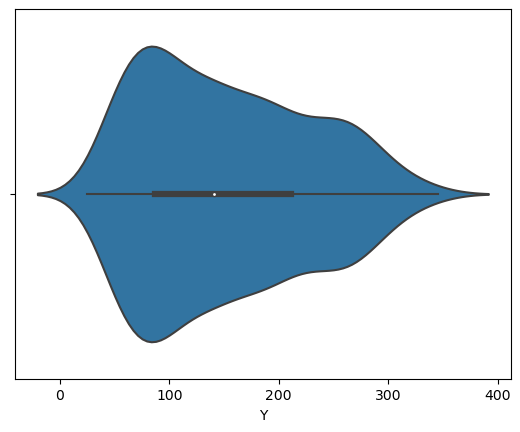

In [28]:
sns.violinplot(x=data['Y'])

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Y', ylabel='Density'>

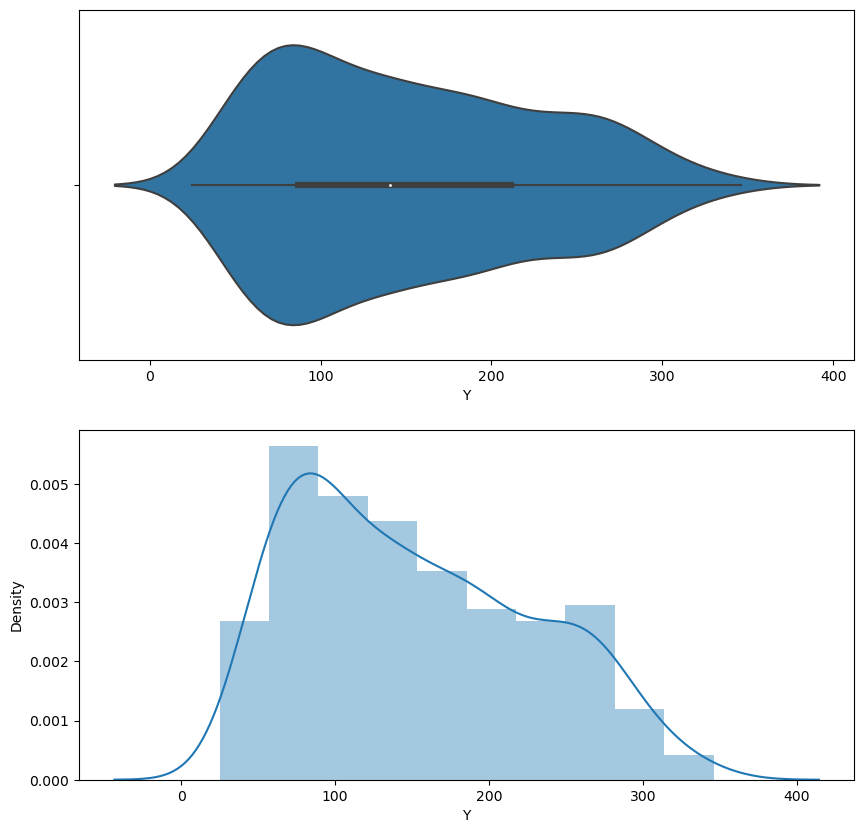

In [29]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['Y'])
sns.distplot(data['Y'], ax=ax[1])

Из приведенных графиков видно, что violinplot действительно показывает распределение плотности.

<AxesSubplot:xlabel='SEX', ylabel='Y'>

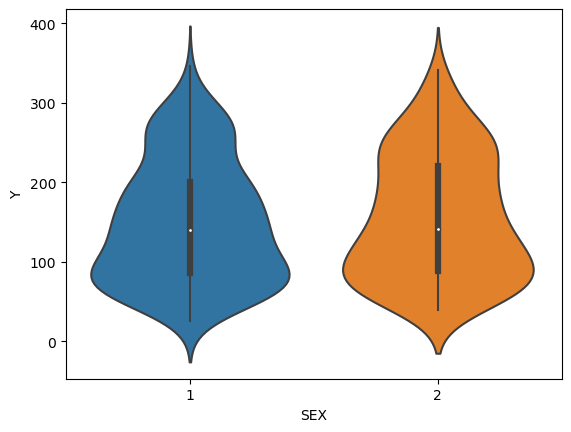

In [30]:
# Распределение параметра Y сгруппированные по SEX.
sns.violinplot(x='SEX', y='Y', data=data)

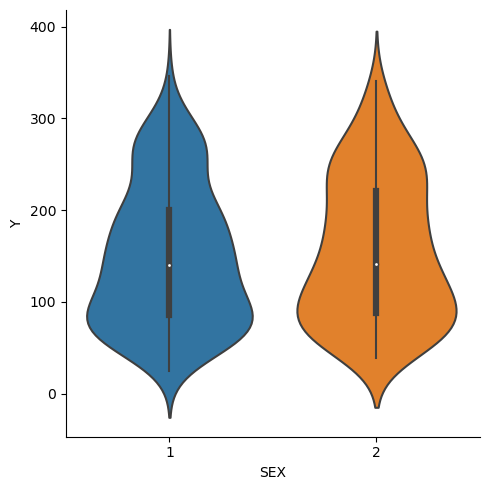

In [31]:
sns.catplot(y='Y', x='SEX', data=data, kind="violin", split=True)

## 4) Информация о корреляции признаков
Проверка корреляции признаков позволяет решить две задачи:

- Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "Occupancy"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
- Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [32]:
data.corr()

AGE       SEX       BMI        BP        S1        S2        S3  \
AGE  1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
SEX  0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
BMI  0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
BP   0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
S1   0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
S2   0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
S3  -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
S4   0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
S5   0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
S6   0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
Y    0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

           S4        S5        S6         Y  
AGE  0.203841  0.270774  0.301731  0.187889  
SEX  0.332115  0.149916  0.208133  0.043062  
BMI  0.413807  0.446157  0.388680  0.586450  
BP   0.257650  0.393480  0.390430  0.441482  
S1   0.542207  0.515503  0.325717  0.212022  
S2   0.659817  0.318357  0.290600  0.174054  
S3  -0.738493 -0.398577 -0.273697 -0.394789  
S4   1.000000  0.617859  0.417212  0.430453  
S5   0.617859  1.000000  0.464669  0.565883  
S6   0.417212  0.464669  1.000000  0.382483  
Y    0.430453  0.565883  0.382483  1.000000

Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).

На основе корреляционной матрицы можно сделать следующие выводы:
- Общий уровень холестерина в сыворотке крови имеет очень сильную положительную корреляцию с уровнем ЛПНП(0.9)
- Уровень ЛПНП имеет некоторую, не очень сильную, положительную корреляцию с общими холестерином
- Уровень ЛПВП и общего холестерина имеют среднюю отрицательную корреляцию
- Общий уровень холестерина и сывороточный уровень триглицеридов имеют очень слабую положительную корреляцию
- Можно увидеть некоторую, на грани погрешности корреляцию между состоянием пациентов через год и ИМТ

In [15]:
from scipy import stats
res = stats.spearmanr(data)
res.correlation
res.pvalue

array([[0.00000000e+000, 1.76700360e-004, 2.15987004e-005,
        2.99818108e-014, 2.11685418e-008, 2.51736555e-006,
        2.45082645e-002, 2.71076838e-006, 1.50605878e-008,
        2.10460090e-010, 2.80613212e-005],
       [1.76700360e-004, 0.00000000e+000, 3.92901136e-002,
        2.40922589e-008, 5.60090327e-001, 4.55805050e-003,
        6.43256065e-018, 3.07712500e-013, 2.24904795e-004,
        1.65792275e-005, 4.32831867e-001],
       [2.15987004e-005, 3.92901136e-002, 0.00000000e+000,
        3.15605023e-018, 7.04578758e-010, 2.34488728e-010,
        6.94455314e-016, 2.00667242e-024, 2.83770318e-028,
        4.89604047e-017, 4.56702393e-038],
       [2.99818108e-014, 2.40922589e-008, 3.15605023e-018,
        0.00000000e+000, 4.00746937e-009, 1.31437880e-005,
        5.29637204e-005, 1.87773461e-009, 4.71615638e-018,
        9.75211654e-017, 5.99278365e-020],
       [2.11685418e-008, 5.60090327e-001, 7.04578758e-010,
        4.00746937e-009, 0.00000000e+000, 1.84226934e-143,
  

Полученные результаты можно проверить построив матрицу корреляций и матрицу p-значений методом Спирмена

Для визуализации корреляционной матрицы будем использовать "тепловую карту" heatmap которая показывает степень корреляции различными цветами.


Метод Пирсона

<AxesSubplot:>

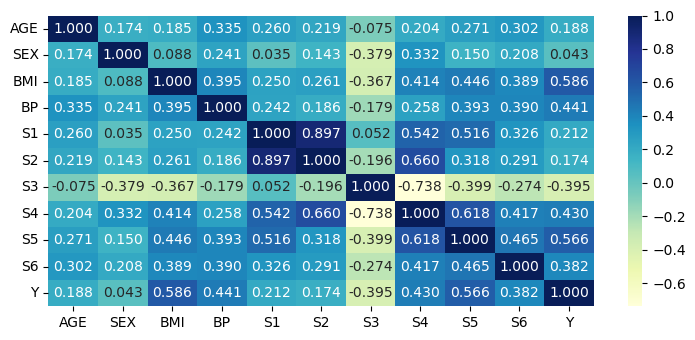

In [37]:
# Метод Пирсона
sns.heatmap(data.corr(), annot=True, fmt='.3f', cmap='YlGnBu',)

C:\Users\kozlo\AppData\Local\Temp\ipykernel_3416\2614611878.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(data.corr(), dtype=np.bool)


<AxesSubplot:>

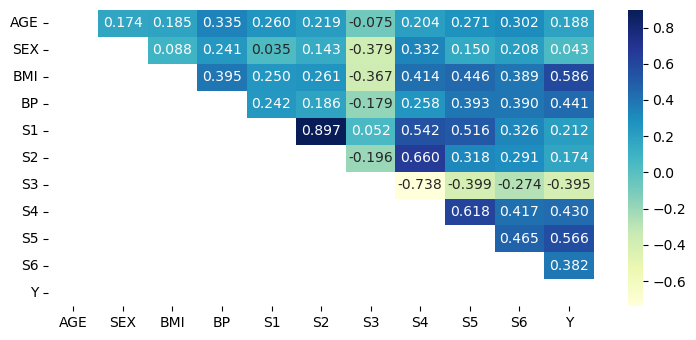

In [39]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f', cmap='YlGnBu')

Метод Спирмена

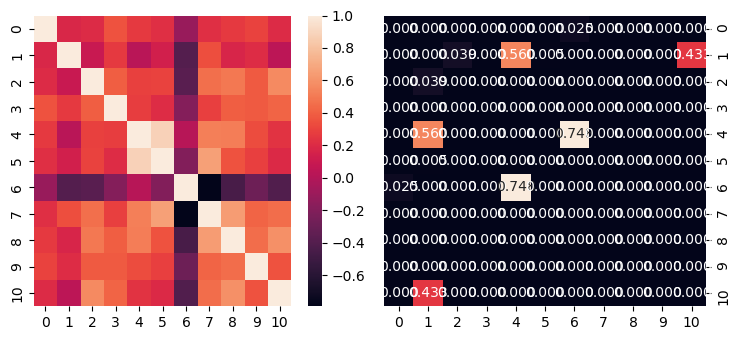

In [35]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.subplots_adjust(wspace=0.01)

sns.heatmap(res.correlation, ax=ax1, )
sns.heatmap(res.pvalue, ax=ax2, cbar=False, annot=True, fmt='.3f')
ax2.yaxis.tick_right()

fig.subplots_adjust(wspace=0.1)
plt.show()